In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_excel('C:/Users/Akshay-Laptop/Desktop/practice/Doctor_fee_consultation/Final Participant Data Folder/Final_Train.xlsx')
data.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [3]:
data.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
Fees                   int64
dtype: object

In [4]:
data.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

In [5]:
data.shape

(5961, 7)

In [6]:
data.Experience.value_counts()

9 years experience     323
10 years experience    294
11 years experience    288
8 years experience     282
12 years experience    279
19 years experience    251
14 years experience    251
13 years experience    242
7 years experience     240
6 years experience     218
15 years experience    200
5 years experience     188
16 years experience    186
18 years experience    184
17 years experience    179
20 years experience    156
21 years experience    154
22 years experience    147
23 years experience    119
4 years experience     115
3 years experience     111
24 years experience     97
0 years experience      87
27 years experience     84
25 years experience     82
28 years experience     82
26 years experience     71
2 years experience      69
30 years experience     68
34 years experience     67
                      ... 
39 years experience     57
31 years experience     55
37 years experience     55
35 years experience     52
40 years experience     46
36 years experience     46
4

In [7]:
for i in range(0,len(data)):
    data['Experience'].loc[i]=data['Experience'].loc[i][0:2]

In [8]:
data.Experience=data.Experience.astype('int64')

In [9]:
bins=[0,10,20,30,40,50,60]
group_names=['less_than_10','10-20Yrs','20-30yrs','30-40yrs','40-50yrs','more_than_50']
data['experience']=pd.cut(data['Experience'],bins,labels=group_names)

In [10]:
data.experience

0           20-30yrs
1           10-20Yrs
2       less_than_10
3           10-20Yrs
4           10-20Yrs
5       less_than_10
6           40-50yrs
7       less_than_10
8           10-20Yrs
9           20-30yrs
10      less_than_10
11      less_than_10
12      less_than_10
13          20-30yrs
14          10-20Yrs
15      less_than_10
16          20-30yrs
17      less_than_10
18          10-20Yrs
19          10-20Yrs
20          20-30yrs
21          10-20Yrs
22          40-50yrs
23          30-40yrs
24          20-30yrs
25      less_than_10
26          20-30yrs
27          10-20Yrs
28          10-20Yrs
29          10-20Yrs
            ...     
5931        10-20Yrs
5932    less_than_10
5933        20-30yrs
5934        10-20Yrs
5935        10-20Yrs
5936        30-40yrs
5937        10-20Yrs
5938        30-40yrs
5939    less_than_10
5940        30-40yrs
5941        20-30yrs
5942    more_than_50
5943    less_than_10
5944    less_than_10
5945    less_than_10
5946        10-20Yrs
5947    less_

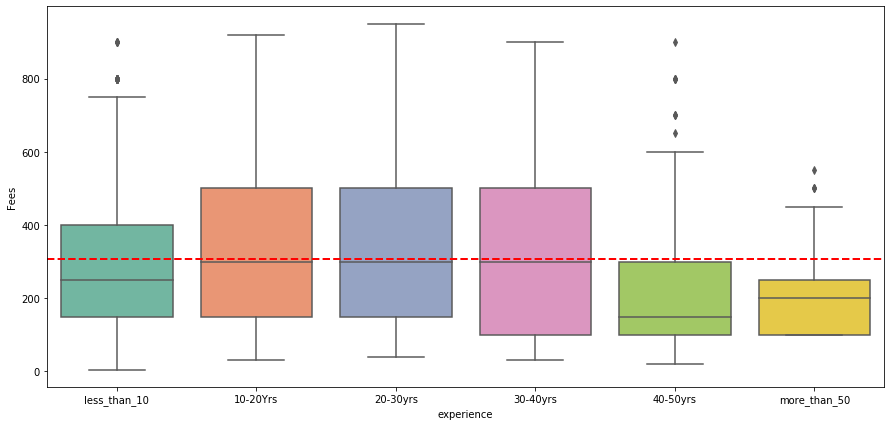

In [11]:
plt.figure(figsize=(15,7))
sns.boxplot(data.experience,data.Fees,palette='Set2')
plt.axhline(data['Fees'].mean(),color='r',linestyle='dashed',linewidth=2)

In [12]:
def experience(col):
    experience=col[0]
    fees=col[1]
    if pd.isnull(experience):
        if (fees>200 & fees<280):
            return 'less_than_10'
        elif (fees>280 & fees<400):
            return '10-20yrs'
        elif (fees>100 & fees<150):
            return '40-50yrs'
        elif (fees>150 & fees<200):
            return 'more_than_50'
        else:
            return '10-20yrs'
    else:
        return experience

In [13]:
data['experience']=data[['experience','Fees']].apply(experience,axis=1)

In [14]:
data.experience.value_counts()

10-20Yrs        2216
less_than_10    1918
20-30yrs         971
30-40yrs         566
40-50yrs         243
more_than_50      34
10-20yrs          13
Name: experience, dtype: int64

In [15]:
data.Rating.value_counts()

100%    684
98%     290
99%     259
97%     241
96%     220
95%     178
94%     115
93%     109
90%      66
92%      66
91%      60
89%      42
88%      41
85%      27
82%      23
83%      21
86%      21
80%      19
77%      16
87%      14
79%      13
84%      13
81%      12
67%      12
71%       9
76%       9
73%       8
75%       8
74%       7
60%       7
78%       6
68%       5
56%       5
69%       4
70%       4
72%       3
57%       3
33%       2
62%       2
55%       2
63%       2
64%       2
40%       1
53%       1
36%       1
45%       1
7%        1
65%       1
58%       1
47%       1
48%       1
Name: Rating, dtype: int64

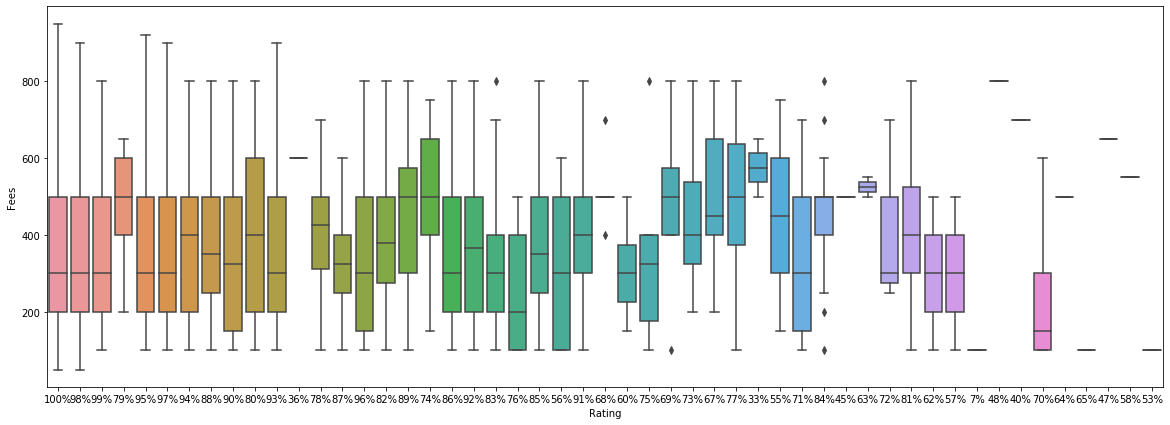

In [16]:
plt.figure(figsize=(20,7))
sns.boxplot(data.Rating,data.Fees)

In [17]:
data.Rating.fillna('60%',inplace=True)

In [18]:
import re
rating=[]
for i in data['Rating']:
    i=re.sub('%','',i)
    rating.append(i)

In [19]:
data['rating']=pd.DataFrame({'rating':rating})

In [20]:
data.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,experience,rating
0,"BHMS, MD - Homeopathy",24,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,20-30yrs,100
1,"BAMS, MD - Ayurveda Medicine",12,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,10-20Yrs,98
2,"MBBS, MS - Otorhinolaryngology",9,60%,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,less_than_10,60
3,"BSc - Zoology, BAMS",12,60%,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,10-20Yrs,60
4,BAMS,20,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,10-20Yrs,100


In [21]:
data.Miscellaneous_Info.value_counts()

Acrylic Partial Denture Crowns and Bridges Fixing Artificial Teeth                                  40
Tooth Extraction Dental Fillings Scaling / Polishing                                                12
Dental Fillings Zirconia Crowns Dental Implant Fixing                                               12
Skin Disease Treatment Kidney Stone Treatment Gall Bladder (Biliary) Stone Treatment                 9
Skin Allergy Treatment Skin Allergies Dermabrasion                                                   9
Cosmetic/ Aesthetic Dentistry Crowns and Bridges Fixing Complete/Partial Dentures Fixing             8
Dermabrasion Laser Resurfacing Acne / Pimples Treatment                                              8
Laser Resurfacing Scar Treatment Wart Removal                                                        7
Skin Care Bacterial Skin Infection Treatment skin checks                                             7
Crowns and Bridges Fixing Impaction / Impacted Tooth Extraction Conservat

In [22]:
data.drop('Miscellaneous_Info',axis=1,inplace=True)

In [23]:
data.head()

,Qualification,Experience,Rating,Place,Profile,Fees,experience,rating
0,"BHMS, MD - Homeopathy",24,100%,"Kakkanad, Ernakulam",Homeopath,100,20-30yrs,100
1,"BAMS, MD - Ayurveda Medicine",12,98%,"Whitefield, Bangalore",Ayurveda,350,10-20Yrs,98
2,"MBBS, MS - Otorhinolaryngology",9,60%,"Mathikere - BEL, Bangalore",ENT Specialist,300,less_than_10,60
3,"BSc - Zoology, BAMS",12,60%,"Bannerghatta Road, Bangalore",Ayurveda,250,10-20Yrs,60
4,BAMS,20,100%,"Keelkattalai, Chennai",Ayurveda,250,10-20Yrs,100


In [24]:
data.Place.value_counts()

HSR Layout, Bangalore              75
Andheri West, Mumbai               70
Dwarka, Delhi                      67
Banjara Hills, Hyderabad           64
Mulund West, Mumbai                54
Borivali West, Mumbai              52
Kandivali West, Mumbai             50
Indiranagar, Bangalore             48
Malad West, Mumbai                 47
Whitefield, Bangalore              47
Malleswaram, Bangalore             47
Pitampura, Delhi                   45
Andheri East, Mumbai               43
Vileparle West, Mumbai             43
Powai, Mumbai                      42
Jubilee Hills, Hyderabad           40
Bannerghatta Road, Bangalore       39
Marathahalli, Bangalore            39
Bandra West, Mumbai                38
Ghatkopar East, Mumbai             38
Kondapur, Hyderabad                38
Rohini, Delhi                      37
Janak Puri, Delhi                  37
Secunderabad, Hyderabad            37
Adyar, Chennai                     37
Shalimar Bagh, Delhi               36
Paschim Viha

In [25]:
data.Place.isnull().sum()

25

In [26]:
data.Place.fillna('value ,missing ,',inplace=True)

In [27]:
def split(string):
    string=re.sub(r'[^A-Za-z]',' ',string)
    string=re.sub(r'\s+',' ',string)
    string=string.split()
    string=string[-1]
    return string
    

In [28]:
data['place']=data['Place'].apply(split)

In [29]:
data.head(50)

,Qualification,Experience,Rating,Place,Profile,Fees,experience,rating,place
0,"BHMS, MD - Homeopathy",24,100%,"Kakkanad, Ernakulam",Homeopath,100,20-30yrs,100,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12,98%,"Whitefield, Bangalore",Ayurveda,350,10-20Yrs,98,Bangalore
2,"MBBS, MS - Otorhinolaryngology",9,60%,"Mathikere - BEL, Bangalore",ENT Specialist,300,less_than_10,60,Bangalore
3,"BSc - Zoology, BAMS",12,60%,"Bannerghatta Road, Bangalore",Ayurveda,250,10-20Yrs,60,Bangalore
4,BAMS,20,100%,"Keelkattalai, Chennai",Ayurveda,250,10-20Yrs,100,Chennai
5,BAMS,8,60%,"Porur, Chennai",Ayurveda,100,less_than_10,60,Chennai
6,BHMS,42,60%,"Karol Bagh, Delhi",Homeopath,200,40-50yrs,60,Delhi
7,BDS,10,99%,"Arekere, Bangalore",Dentist,200,less_than_10,99,Bangalore
8,"MBBS, MD - General Medicine",14,60%,"Old City, Hyderabad",General Medicine,100,10-20Yrs,60,Hyderabad
9,"BSc, BDS",23,60%,"Athani, Ernakulam",Dentist,100,20-30yrs,60,Ernakulam


In [30]:
data.place.value_counts()

Bangalore             1258
Mumbai                1219
Delhi                 1185
Hyderabad              951
Chennai                855
Coimbatore             228
Ernakulam              153
Thiruvananthapuram      86
missing                 25
e                        1
Name: place, dtype: int64

In [31]:
data=data[data.place!='e']

In [32]:
data.place.value_counts()

Bangalore             1258
Mumbai                1219
Delhi                 1185
Hyderabad              951
Chennai                855
Coimbatore             228
Ernakulam              153
Thiruvananthapuram      86
missing                 25
Name: place, dtype: int64

In [33]:
def split(string):
    string=re.sub(r'[^A-Za-z]',' ',string)
    string=re.sub(r'[-]','',string)
    string=re.sub(r'\s+',' ',string)
    string=string.split()
    string=string[-1]
    return string

In [34]:
data['Qual']=data['Qualification'].apply(split)

In [35]:
data.Qual.value_counts()

MBBS                   632
BDS                    623
BAMS                   515
BHMS                   513
Medicine               494
ENT                    358
Dermatology            288
Leprosy                184
Surgery                167
Homeopathy             127
DLO                    122
DDVL                   109
Otorhinolaryngology     88
Endodontics             86
DDV                     82
Dentistry               67
MDS                     64
Venereology             53
Orthopaedics            53
Orthodontics            53
Implantology            51
Prosthodontics          48
PGDD                    38
Diabetology             35
DNB                     31
Pedodontics             29
Ayurveda                29
Periodontics            28
Bridge                  27
you                     24
                      ... 
Phonosurgery             1
Implantalogist           1
Dieseas                  1
Neck                     1
Physiotherapy            1
TOURISM                  1
P

In [36]:
data.head()

,Qualification,Experience,Rating,Place,Profile,Fees,experience,rating,place,Qual
0,"BHMS, MD - Homeopathy",24,100%,"Kakkanad, Ernakulam",Homeopath,100,20-30yrs,100,Ernakulam,Homeopathy
1,"BAMS, MD - Ayurveda Medicine",12,98%,"Whitefield, Bangalore",Ayurveda,350,10-20Yrs,98,Bangalore,Medicine
2,"MBBS, MS - Otorhinolaryngology",9,60%,"Mathikere - BEL, Bangalore",ENT Specialist,300,less_than_10,60,Bangalore,Otorhinolaryngology
3,"BSc - Zoology, BAMS",12,60%,"Bannerghatta Road, Bangalore",Ayurveda,250,10-20Yrs,60,Bangalore,BAMS
4,BAMS,20,100%,"Keelkattalai, Chennai",Ayurveda,250,10-20Yrs,100,Chennai,BAMS


In [37]:
data.rating=data.rating.astype('int64')

In [38]:
data_new=data.drop(['Qualification','Experience','Rating','Place'],axis=1)

In [39]:
data_new.head()

,Profile,Fees,experience,rating,place,Qual
0,Homeopath,100,20-30yrs,100,Ernakulam,Homeopathy
1,Ayurveda,350,10-20Yrs,98,Bangalore,Medicine
2,ENT Specialist,300,less_than_10,60,Bangalore,Otorhinolaryngology
3,Ayurveda,250,10-20Yrs,60,Bangalore,BAMS
4,Ayurveda,250,10-20Yrs,100,Chennai,BAMS


In [40]:
data_new1=pd.get_dummies(data_new,drop_first=True)

In [41]:
data_new1.shape

(5960, 317)

In [42]:
data_new1.head()

,Fees,rating,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath,experience_10-20yrs,experience_20-30yrs,experience_30-40yrs,...,Qual_designing,Qual_experience,Qual_germany,Qual_implantlogy,Qual_london,Qual_management,Qual_panchkarma,Qual_surgeon,Qual_surgery,Qual_you
0,100,100,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,350,98,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,300,60,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,250,60,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,250,100,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
test=pd.read_excel('C:/Users/Akshay-Laptop/Desktop/practice/Doctor_fee_consultation/Final Participant Data Folder/Final_Test.xlsx')
test.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [44]:
for i in range(0,len(test)):
    test['Experience'].loc[i]=test['Experience'].loc[i][0:2]

In [45]:
test.Experience=test.Experience.astype('int64')

In [46]:
bins=[0,10,20,30,40,50,60]
group_names=['less_than_10','10-20Yrs','20-30yrs','30-40yrs','40-50yrs','more_than_50']
test['experience']=pd.cut(test['Experience'],bins,labels=group_names)

In [47]:
test.experience

0           30-40yrs
1           30-40yrs
2           30-40yrs
3                NaN
4           10-20Yrs
5           10-20Yrs
6           20-30yrs
7       less_than_10
8           10-20Yrs
9           40-50yrs
10      less_than_10
11          30-40yrs
12          10-20Yrs
13          10-20Yrs
14      less_than_10
15      less_than_10
16          10-20Yrs
17          20-30yrs
18      less_than_10
19          30-40yrs
20          10-20Yrs
21      less_than_10
22      less_than_10
23          10-20Yrs
24          40-50yrs
25          20-30yrs
26          20-30yrs
27      less_than_10
28          20-30yrs
29      less_than_10
            ...     
1957    less_than_10
1958        30-40yrs
1959        40-50yrs
1960        20-30yrs
1961    less_than_10
1962        10-20Yrs
1963    less_than_10
1964    less_than_10
1965        30-40yrs
1966        20-30yrs
1967        10-20Yrs
1968        20-30yrs
1969        30-40yrs
1970    less_than_10
1971        20-30yrs
1972        10-20Yrs
1973    less_

In [48]:
test.Rating.fillna('60%',inplace=True)

In [49]:
import re
rating=[]
for i in test['Rating']:
    i=re.sub('%','',i)
    rating.append(i)

In [50]:
test['rating']=pd.DataFrame({'rating':rating})

In [51]:
test.drop('Miscellaneous_Info',axis=1,inplace=True)

In [52]:
test.head()

,Qualification,Experience,Rating,Place,Profile,experience,rating
0,MBBS,35,60%,"Ghatkopar East, Mumbai",General Medicine,30-40yrs,60
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31,60%,"West Marredpally, Hyderabad",ENT Specialist,30-40yrs,60
2,"MBBS, DDVL",40,70%,"KK Nagar, Chennai",Dermatologists,30-40yrs,70
3,BAMS,0,60%,"New Ashok Nagar, Delhi",Ayurveda,NaN,60
4,"BDS, MDS - Conservative Dentistry & Endodontics",16,100%,"Kanakpura Road, Bangalore",Dentist,10-20Yrs,100


In [53]:
test.Place.fillna('value ,missing ,',inplace=True)

In [54]:
test['place']=test['Place'].apply(split)

In [55]:
test=test[test.place!='e']

In [56]:
test['Qual']=test['Qualification'].apply(split)

In [57]:
test.rating=test.rating.astype('int64')

In [58]:
test.head()

,Qualification,Experience,Rating,Place,Profile,experience,rating,place,Qual
0,MBBS,35,60%,"Ghatkopar East, Mumbai",General Medicine,30-40yrs,60,Mumbai,MBBS
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31,60%,"West Marredpally, Hyderabad",ENT Specialist,30-40yrs,60,Hyderabad,DLO
2,"MBBS, DDVL",40,70%,"KK Nagar, Chennai",Dermatologists,30-40yrs,70,Chennai,DDVL
3,BAMS,0,60%,"New Ashok Nagar, Delhi",Ayurveda,NaN,60,Delhi,BAMS
4,"BDS, MDS - Conservative Dentistry & Endodontics",16,100%,"Kanakpura Road, Bangalore",Dentist,10-20Yrs,100,Bangalore,Endodontics


In [59]:
test.isnull().sum()

Qualification     0
Experience        0
Rating            0
Place             0
Profile           0
experience       32
rating            0
place             0
Qual              0
dtype: int64

In [60]:
test.shape

(1987, 9)

In [61]:
test.dropna(inplace=True)

In [62]:
test_new=test.drop(['Qualification','Experience','Rating','Place'],axis=1)

In [63]:
test_new.head()

,Profile,experience,rating,place,Qual
0,General Medicine,30-40yrs,60,Mumbai,MBBS
1,ENT Specialist,30-40yrs,60,Hyderabad,DLO
2,Dermatologists,30-40yrs,70,Chennai,DDVL
4,Dentist,10-20Yrs,100,Bangalore,Endodontics
5,Dentist,10-20Yrs,90,Chennai,MDS


In [64]:
test_new=pd.get_dummies(test_new,drop_first=True)

In [65]:
data_new1.shape,test_new.shape

((5960, 317), (1955, 197))

In [66]:
data_in=data_new1.drop('Fees',axis=1)
data_op=data_new1.Fees

In [67]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import KFold

In [68]:
from sklearn.model_selection import cross_val_score as cvs
from sklearn.model_selection import train_test_split as tts

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
lr=LinearRegression()
max_score=0
for i in range(0,100):
    x_train,x_test,y_train,y_test=tts(data_in,data_op,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    rscore=r2_score(y_test,y_pred)
    print('at random state {} r2score is:{}'.format(i,rscore))
    if rscore>max_score:
            max_score=rscore
            final_state=i
print('Max_score is :',max_score,'at',final_state)

at random state 0 r2score is:-3.8067793662102464e+20
at random state 1 r2score is:-1.0795354867670222e+21
at random state 2 r2score is:-1.346299860649169e+20
at random state 3 r2score is:-7.498699084453317e+18
at random state 4 r2score is:0.15311533270718825
at random state 5 r2score is:0.14693398274133151
at random state 6 r2score is:-3.616647303277136e+20
at random state 7 r2score is:-8.504470290134866e+19
at random state 8 r2score is:0.13565292057937395
at random state 9 r2score is:-3.925108438955528e+19
at random state 10 r2score is:-9.981289623173071e+17
at random state 11 r2score is:0.18025665981577843
at random state 12 r2score is:0.17197688431602842
at random state 13 r2score is:0.191246351217482
at random state 14 r2score is:0.14651179397919312
at random state 15 r2score is:-3.6443404221829504e+18
at random state 16 r2score is:-9.689652844229129e+19
at random state 17 r2score is:-1.4921603620735712e+17
at random state 18 r2score is:-1.0505594311803615e+18
at random state 19 r2

In [70]:
from sklearn.ensemble import RandomForestRegressor as RFR
RFR=RFR(random_state=40)
RFR.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=40, verbose=0,
                      warm_start=False)

In [71]:
from sklearn.model_selection import GridSearchCV
parameters=[{'random_state':range(0,100),'max_depth':range(2,10)}]
grid_search=GridSearchCV(estimator=RFR,param_grid=parameters,scoring='r2',cv=10,n_jobs=-1)
grid_search=grid_search.fit(x_train,y_train)

In [72]:
print(grid_search.best_params_)
score=grid_search.best_score_
score

{'max_depth': 9, 'random_state': 60}


0.17822426813218892

In [73]:
from sklearn.ensemble import RandomForestRegressor as RFR
RFR=RFR(random_state=60,max_depth=9)
RFR.fit(x_train,y_train)
y_pred=RFR.predict(x_test)
train_pred=RFR.predict(x_train)
rscore=r2_score(y_test,y_pred)
rscore1=r2_score(y_train,train_pred)
kf = KFold(shuffle=True, n_splits=10)
cv=cvs(RFR,data_in,data_op,cv=kf,scoring='r2')
print('rscore for testing data:',rscore)
print('rscore for training data:',rscore1)
print('Cross val score:',cv)
print('Mean cv:',np.mean(cv))


rscore for testing data: 0.16948836237780696
rscore for training data: 0.29710748203382664
Cross val score: [0.15715777 0.23600939 0.17182223 0.1670114  0.21649704 0.11570289
 0.15477484 0.19582195 0.17666474 0.1589974 ]
Mean cv: 0.1750459659913197


In [74]:
fees=pd.DataFrame({'Actual Fees':y_test,'Predicted Fees':y_pred})
fees.to_csv('project18_op.csv')

In [75]:
from sklearn.neighbors import KNeighborsRegressor
KNR=KNeighborsRegressor(n_neighbors=5,leaf_size=30)
KNR.fit(x_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [76]:
from sklearn.model_selection import GridSearchCV
parameters=[{'n_neighbors':range(3,20),'weights':['uniform','distance'],'leaf_size':[30,50,100]}]
grid_search=GridSearchCV(estimator=KNR,param_grid=parameters,scoring='r2',cv=10,n_jobs=-1)
grid_search=grid_search.fit(x_train,y_train)
print(grid_search.best_params_)
score=grid_search.best_score_
score

{'leaf_size': 30, 'n_neighbors': 19, 'weights': 'uniform'}


0.14987928888463026

In [77]:
from sklearn.ensemble import GradientBoostingRegressor as GBR
GBR=GBR(alpha=0.1)

In [78]:
GBR.fit(x_train,y_train)
y_pred=GBR.predict(x_test)
train_pred=GBR.predict(x_train)
rscore=r2_score(y_test,y_pred)
rscore1=r2_score(y_train,train_pred)
kf = KFold(shuffle=True, n_splits=10)
cv=cvs(GBR,data_in,data_op,cv=kf,scoring='r2')


In [79]:
for i in range(0,1):
    print('rscore for testing data:',rscore)
    print('rscore for training data:',rscore1)
    print('Cross val score:',cv)
    print('Mean cv:',np.mean(cv))

rscore for testing data: 0.1911944554895495
rscore for training data: 0.23752062922743133
Cross val score: [0.13185541 0.23838293 0.18589028 0.17896666 0.24601167 0.14003847
 0.17442247 0.20595189 0.18524219 0.18625996]
Mean cv: 0.18730219258161368


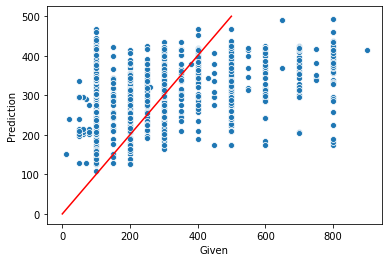

In [80]:
plot_k = sns.scatterplot(y_test, y_pred)
plot_k.set(xlabel='Given', ylabel='Prediction')
x_plot = np.linspace(0,500,10)
y_plot = x_plot
plt.plot(x_plot, y_plot, color='r')

In [81]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print('error:')
print('Mean absolute error of test data:',mean_absolute_error(y_test,y_pred))
print('Mean absolute error of train data:',mean_absolute_error(y_train,train_pred))
print('Mean squared error of test data:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('Mean squared error of train data:',np.sqrt(mean_squared_error(y_train,train_pred)))

error:
Mean absolute error of test data: 138.22015916953848
Mean absolute error of train data: 131.6010551059568
Mean squared error of test data: 175.4236296066303
Mean squared error of train data: 165.7766838619083


In [82]:
from sklearn.tree import DecisionTreeRegressor as DTC
DTC=DTC()
DTC.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [83]:
from sklearn.model_selection import GridSearchCV
parameters=[{'random_state':range(0,100),'max_depth':range(2,11)}]
grid_search=GridSearchCV(estimator=DTC,param_grid=parameters,scoring='r2',cv=10,n_jobs=-1)
grid_search=grid_search.fit(x_train,y_train)
print(grid_search.best_params_)
score=grid_search.best_score_
score

{'max_depth': 6, 'random_state': 42}


0.14073113762604497

In [84]:
from sklearn.externals import joblib

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [85]:
joblib.dump(RFR,'project18_RFR.pkl')

['project18_RFR.pkl']